# 📈 Task 8: Clustering with K-Means

**Objective:** Perform unsupervised learning with K-Means clustering

#### 🧩 Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#### 📥 Load Dataset

In [3]:
df = pd.read_csv("Iris_Clustering.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 📊 Visualize Feature Relationships

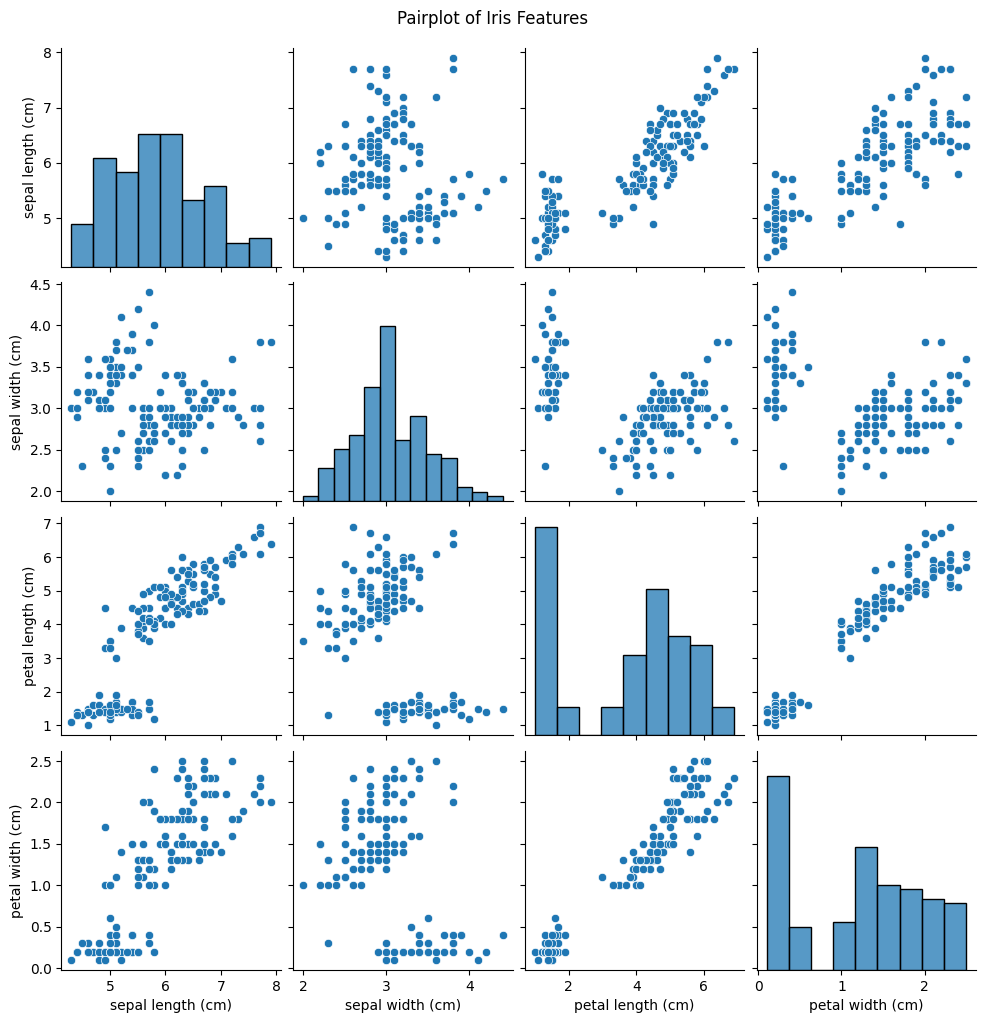

In [4]:
sns.pairplot(df.drop('target', axis=1))
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

#### 📉 PCA for Dimensionality Reduction

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop('target', axis=1))

#### 📌 Elbow Method to Choose K

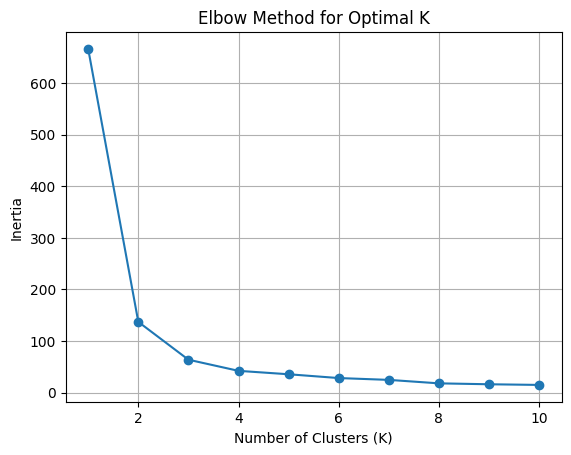

In [6]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

#### 🔄 Fit KMeans (K=3) & Assign Labels

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

df['cluster'] = labels

#### 🎯 Visualize Clusters in 2D (PCA Space)

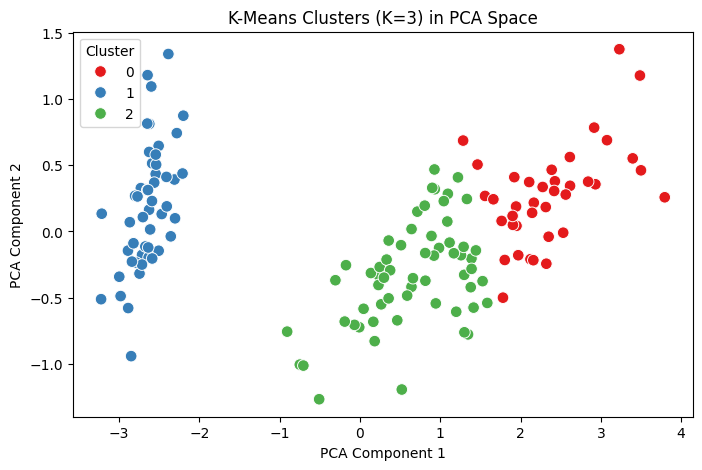

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="Set1", s=70)
plt.title("K-Means Clusters (K=3) in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

#### 📈 Evaluate Using Silhouette Score


In [9]:
X_features = df.drop(['target', 'cluster'], axis=1)
score = silhouette_score(X_features, df['cluster'])
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.5512
